In [1]:
import bifacialvf    
import os
# change directory to \bifacialvf\ root
os.chdir(os.path.dirname(bifacialvf.__file__))
%pwd

/Users/eleonorakiziv/Desktop/bifacialvf-master/bifacialvf


u'/Users/eleonorakiziv/Desktop/bifacialvf-master/bifacialvf'

In [3]:
beta = 10
C = 1                      # GroundClearance(panel slope lengths)
sazm = 180                 # PV Azimuth(deg)
rtr = 1.5 

TMYtoread = "data/724010TYA.csv"   # VA Richmond

# Set optional variables.  These are the default values
rowType = "interior"        # RowType(first interior last single)
transFactor = 0.013         # TransmissionFactor(open area fraction)
cellRows = 6                # CellRows(# hor rows in panel)   This is the number of irradiance values returned along module chord
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)


# 1-axis tracking instructions (optional)
tracking=False
backtrack=True       # backtracking optimization as defined in pvlib             

albedo = 1               # ground albedo beneath system  

while albedo < 1.04: 
    writefiletitle = "data/Output/albedo" + str(albedo) 
    bifacialvf.simulate(TMYtoread, writefiletitle, beta, sazm, 
                C=C, rtr = rtr, rowType=rowType, transFactor=transFactor, cellRows=cellRows,
                PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, albedo=albedo, 
                tracking=tracking, backtrack=backtrack, )
    albedo = albedo+0.05

 
********* 
Running Simulation for TMY3:  data/724010TYA.csv
Location:   "RICHMOND INTERNATIONAL AP"
Lat:  37.517  Long:  -77.317  Tz  -5.0
Parameters: beta:  10   Sazm:  180   Height:  1   rtr separation:  1.5   Row type:  interior   Albedo:  1
Saving into data/Output/albedo1
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.451624382235
Actual distance between rows =  0.515192246988
 
Finished


The bifacial ratio for albedo 0.1 is: 2.7%
The bifacial ratio for albedo 0.15 is: 4.0%
The bifacial ratio for albedo 0.2 is: 5.3%
The bifacial ratio for albedo 0.25 is: 6.6%
The bifacial ratio for albedo 0.3 is: 7.9%
The bifacial ratio for albedo 0.35 is: 9.2%
The bifacial ratio for albedo 0.4 is: 10.5%
The bifacial ratio for albedo 0.45 is: 11.8%
The bifacial ratio for albedo 0.5 is: 13.1%
The bifacial ratio for albedo 0.55 is: 14.4%
The bifacial ratio for albedo 0.6 is: 15.7%
The bifacial ratio for albedo 0.65 is: 17.0%
The bifacial ratio for albedo 0.7 is: 18.3%
The bifacial ratio for albedo 0.75 is: 19.6%
The bifacial ratio for albedo 0.8 is: 20.9%
The bifacial ratio for albedo 0.85 is: 22.2%
The bifacial ratio for albedo 0.9 is: 23.5%
The bifacial ratio for albedo 0.95 is: 24.8%
The bifacial ratio for albedo 1.0 is: 26.1%


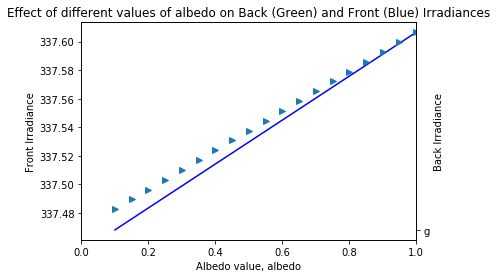

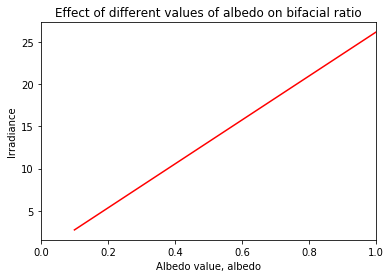

In [14]:
# This part is responsible for interpreting the data. 

from loadVFresults import loadVFresults
irradiance = {};
backIrr = {};
frontIrr = {}; 

albedo = 0.1
while albedo < 1.04: 
    (data, metadata) = loadVFresults("data/Output/albedo_calculation/albedo" + str(albedo))

    # calculate average front and back global tilted irradiance across the module chord
    data['GTIFrontavg'] = data[['No_1_RowFrontGTI', 'No_2_RowFrontGTI','No_3_RowFrontGTI','No_4_RowFrontGTI','No_5_RowFrontGTI','No_6_RowFrontGTI']].mean(axis=1)
    data['GTIBackavg'] = data[['No_1_RowBackGTI', 'No_2_RowBackGTI','No_3_RowBackGTI','No_4_RowBackGTI','No_5_RowBackGTI','No_6_RowBackGTI']].mean(axis=1)

    # Print the annual bifacial ratio
    frontIrrSum = data['GTIFrontavg'].sum()
    backIrrSum = data['GTIBackavg'].sum()
    percentage = backIrrSum/frontIrrSum*100
    print('The bifacial ratio for albedo {} is: {:.1f}%'.format(albedo, percentage))
    
    irradiance[albedo] = percentage
    backIrr[albedo] = data['GTIBackavg'].mean()
    frontIrr[albedo] = data['GTIFrontavg'].mean()
    albedo = albedo + 0.05
    
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# This is how the front and back irradiances are affected by different values of rtr 
fig, ax = plt.subplots()
ax.set_title('Effect of different values of albedo on Back (Green) and Front (Blue) Irradiances')
plt.xlim(0, 1)
ax1 = ax.twinx()
ax.set_xlabel("Albedo value, albedo")
ax1.set_ylabel("Back Irradiance")
ax.set_ylabel("Front Irradiance")

front_irr_list = sorted(frontIrr.items())
f, g = zip(*front_irr_list)
ax.plot(f, g, 'b')

back_irr_list = sorted(backIrr.items())
b, c = zip(*back_irr_list)
ax1.plot(b, c, '>', 'g')



# This is how bifacial ratio is affected by difference azimuth angles 
fig2, ax2 = plt.subplots()
ax2.set_title('Effect of different values of albedo on bifacial ratio')
plt.xlim(0, 1)
ax2.set_xlabel("Albedo value, albedo")
ax2.set_ylabel("Irradiance")
irr_list = sorted(irradiance.items()) # sorted by key, return a list of tuples
x, y = zip(*irr_list) # unpack a list of pairs into two tuples
ax2.plot(x, y, 'r')